# K-means clustering on color image
# Name : Jinhyuk-Park
# Student-ID : 20141775

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images



#
# normalize the values of the input data to be [0, 1]
#
# def normalize(data):

#     data_normalized = (data - min(data)) / (max(data) - min(data))

#     return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    #r = np.sqrt(s)

    return(s)

#
# calcuate the values of the input data in l2-norm
#
def norm(x):
    r = np.sqrt(x.T * x)
    
    return(r)
    

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

k = 10
list_centroid = np.zeros((size_row * size_col, k), dtype=float)
list_count = np.zeros(k)
for line in data:

    line_data   = line.split(',')
    label       = random.randint(0, k - 1)
    im_vector   = np.asfarray(line_data[1:])
#     im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector
    list_centroid[:, label]+= im_vector
    list_count[label]      += 1

    count += 1

for i in range(0, k):
    list_centroid[:, i] /= list_count[i]


while True:
    checkUpdate = 0
    for i in range(0, num_image):
        label = int(list_label[i])
        min = distance(list_centroid[:, label], list_image[:, i])
        for j in range(0, k):
            if j == label:
                continue

            checkDistance = distance(list_centroid[:, j], list_image[:, i])
            if(min > checkDistance):
                list_label[i] = str(j)
                min = checkDistance
                checkUpdate += 1
    
    if(checkUpdate == 0):
        break
    
    list_centroid = np.zeros((size_row * size_col, k), dtype=float)
    list_count = np.zeros(k)
    
    for i in range(0, num_image):
        label = int(list_label[i])
        list_centroid[:, label] += list_image[:, i]
        list_count[label]       += 1
        
    for i in range(0, k):
        list_centroid[:, i] /= list_count[i]

<Figure size 640x480 with 10 Axes>

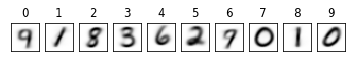

In [2]:
# 
# plot 0 ~ 9 mean-images with their labels
# 
f1 = plt.figure(1)

for i in range(0, k):

    label       = i
    im_vector   = list_centroid[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()